In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.region.max()

'region_9'

In [5]:
train.shape

(54808, 14)

In [6]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
train.education.value_counts(sort=False)

Master's & above    14925
Below Secondary       805
Bachelor's          36669
Name: education, dtype: int64

In [8]:
print('Missing values percentage in each row:')
for column in train.columns:
    print(column + ': '+str(train[column].isnull().sum()/train.shape[0])+' %')

Missing values percentage in each row:
employee_id: 0.0 %
department: 0.0 %
region: 0.0 %
education: 0.04395343745438622 %
gender: 0.0 %
recruitment_channel: 0.0 %
no_of_trainings: 0.0 %
age: 0.0 %
previous_year_rating: 0.07524448985549555 %
length_of_service: 0.0 %
KPIs_met >80%: 0.0 %
awards_won?: 0.0 %
avg_training_score: 0.0 %
is_promoted: 0.0 %


# LabelEncoding the categoricals

# Department

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
dep_lr = LabelEncoder()

In [11]:
train.department = dep_lr.fit_transform(train.department)

In [12]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Region

In [13]:
reg_lr = LabelEncoder()

In [14]:
train.region = reg_lr.fit_transform(train.region)

In [15]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,14,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,10,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,15,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,18,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Education

In [16]:
edu_lr = LabelEncoder()

Education column has missing values so they have to be filled first

# Filling missing values in education

In [17]:
edu_df = train[['department','region','gender','length_of_service','age','education']]

In [18]:
edu_df.head()

,department,region,gender,length_of_service,age,education
0,7,31,f,8,35,Master's & above
1,4,14,m,4,30,Bachelor's
2,7,10,m,7,34,Bachelor's
3,7,15,m,10,39,Bachelor's
4,8,18,m,2,45,Bachelor's


In [19]:
edu_df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [20]:
edu_df.groupby(['length_of_service'])['education'].apply(lambda x:x.value_counts().index[0])

length_of_service
1           Bachelor's
2           Bachelor's
3           Bachelor's
4           Bachelor's
5           Bachelor's
6           Bachelor's
7           Bachelor's
8           Bachelor's
9           Bachelor's
10          Bachelor's
11          Bachelor's
12          Bachelor's
13          Bachelor's
14          Bachelor's
15    Master's & above
16    Master's & above
17    Master's & above
18    Master's & above
19    Master's & above
20    Master's & above
21    Master's & above
22          Bachelor's
23    Master's & above
24    Master's & above
25          Bachelor's
26    Master's & above
27          Bachelor's
28          Bachelor's
29    Master's & above
30    Master's & above
31    Master's & above
32    Master's & above
33    Master's & above
34          Bachelor's
37          Bachelor's
Name: education, dtype: object

In [21]:
train['education'] = train['education'].fillna(train.groupby(['age'])['education'].apply(lambda x:x.mode()[0]))

In [22]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2406
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [23]:
train.education = train.education.fillna("Bachelor's")

In [24]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Label Encoding education

In [25]:
train.education = edu_lr.fit_transform(train.education)

In [26]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,m,other,1,45,3.0,2,0,0,73,0


# Gender

In [27]:
gen_lr = LabelEncoder()

In [28]:
train.gender = gen_lr.fit_transform(train.gender)

In [29]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,other,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,other,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,other,1,45,3.0,2,0,0,73,0


# recruitment_channel

In [30]:
recChannel_lr = LabelEncoder()

In [31]:
train.recruitment_channel = recChannel_lr.fit_transform(train.recruitment_channel)

In [32]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# Filling missing values in previous_year_rating

In [33]:
train.dtypes

employee_id               int64
department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [34]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [35]:
train.previous_year_rating = train.previous_year_rating.astype('category')

In [36]:
train.dtypes

employee_id                int64
department                 int32
region                     int32
education                  int32
gender                     int32
recruitment_channel        int32
no_of_trainings            int64
age                        int64
previous_year_rating    category
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object

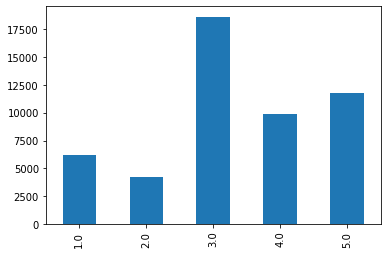

In [37]:
train.previous_year_rating.value_counts(sort=False).plot(kind='bar')

In [38]:
train.groupby(["KPIs_met >80%",'length_of_service'])['previous_year_rating'].agg(lambda x:x.mode()[0])

KPIs_met >80%  length_of_service
0              1                    3.0
               2                    3.0
               3                    3.0
               4                    3.0
               5                    3.0
                                   ... 
1              30                   4.0
               31                   5.0
               32                   5.0
               33                   5.0
               34                   5.0
Name: previous_year_rating, Length: 69, dtype: float64

In [39]:
pd.pivot_table(train,values=['previous_year_rating'],index=['KPIs_met >80%'],aggfunc=lambda x:x.mode()[0])

,previous_year_rating
KPIs_met >80%,
0,3.0
1,5.0


In [40]:
train.previous_year_rating = train.previous_year_rating.fillna(train.groupby("KPIs_met >80%")['previous_year_rating'].apply(lambda x:x.mode()[0]))

In [41]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(train.groupby('KPIs_met >80%')['previous_year_rating'].transform(lambda x:x.mode()[0]))

In [42]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [43]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [44]:
train.rename(columns={'KPIs_met >80%':'KPI','awards_won?':'awards_won'},inplace=True)

In [45]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# Univariate analysis of continous variables

# AGE

In [46]:
train.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

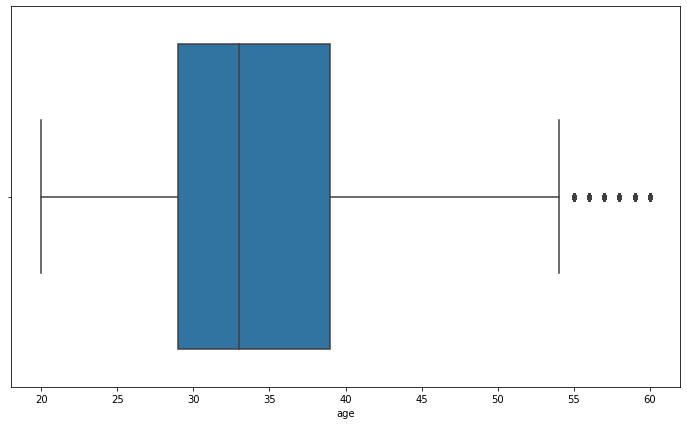

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(train.age)

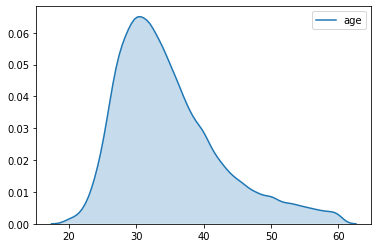

In [48]:
sns.kdeplot(train.age,shade=True)

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

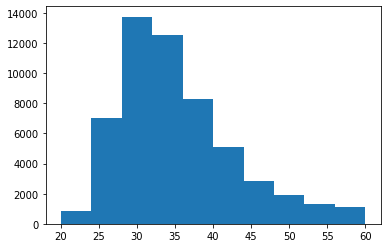

In [49]:
plt.hist(train.age)

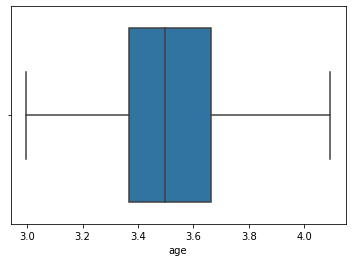

In [50]:
sns.boxplot(np.log(train.age))

Applying log transformation to age

In [51]:
train['age_log'] = np.log(train.age)

In [52]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


# avg_training_score

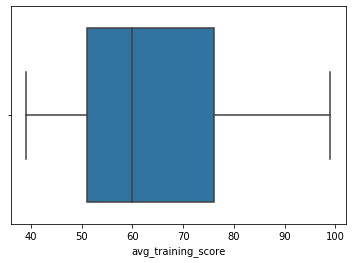

In [53]:
sns.boxplot(train.avg_training_score)

In [54]:
np.median(train.avg_training_score)

60.0

In [55]:
np.mean(train.avg_training_score)

63.38675010947307

In [56]:
train.avg_training_score.min()

39

In [57]:
train.avg_training_score.max()

99

# Uni-Variate analysis on categorical features

In [58]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


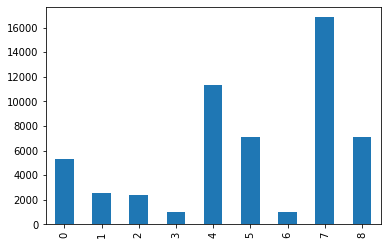

In [59]:
train.department.value_counts(sort=False).plot(kind='bar')

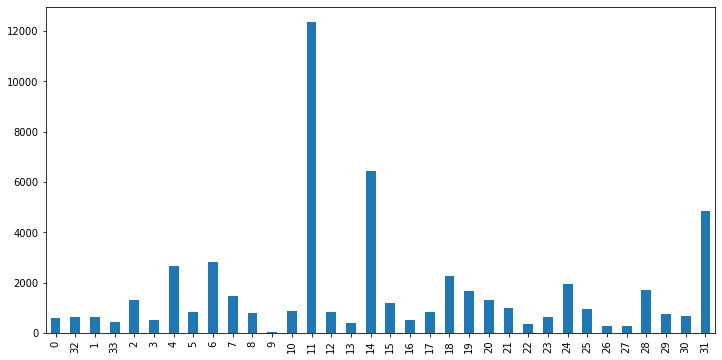

In [60]:
plt.figure(figsize=(12,6))
train.region.value_counts(sort=False).plot(kind='bar')

Categories in this attribute are imbalanced...should try SMOTE technique while model building

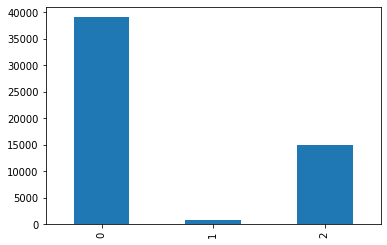

In [61]:
train.education.value_counts(sort=False).plot(kind = 'bar')

Highly imbalanced data

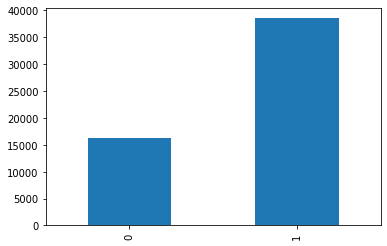

In [62]:
train.gender.value_counts(sort=False).plot(kind='bar')

In [63]:
gen_lr.classes_

array(['f', 'm'], dtype=object)

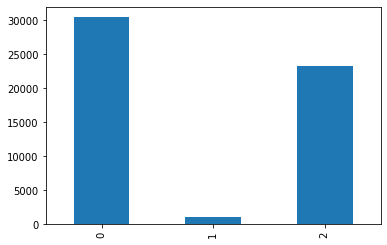

In [64]:
train.recruitment_channel.value_counts(sort=False).plot(kind='bar')

In [65]:
train.no_of_trainings.value_counts(sort=False)

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
Name: no_of_trainings, dtype: int64

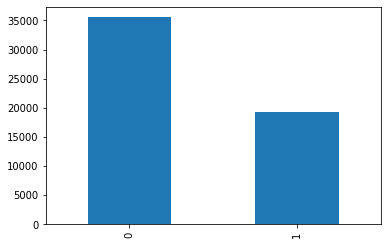

In [66]:
train.KPI.value_counts(sort=False).plot(kind='bar')

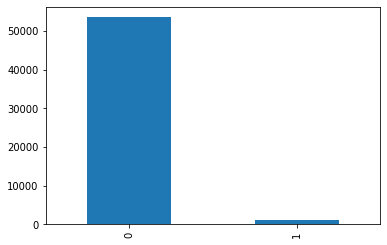

In [67]:
train.awards_won.value_counts(sort=False).plot(kind='bar')

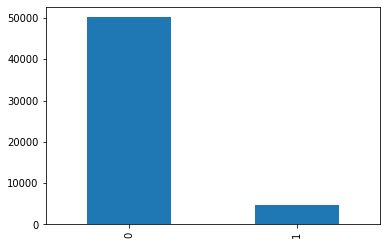

In [68]:
train.is_promoted.value_counts(sort=False).plot(kind='bar')

# Bi-variate with target

In [69]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


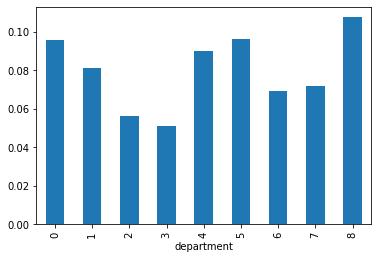

In [70]:
train.groupby(['department'])['is_promoted'].agg(np.mean).plot(kind='bar')

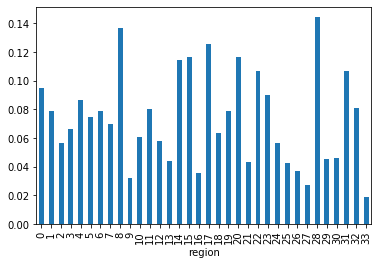

In [71]:
train.groupby(['region'])['is_promoted'].agg(np.mean).plot(kind='bar')

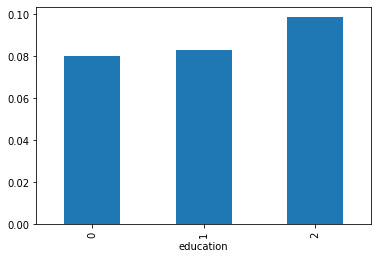

In [72]:
train.groupby(['education'])['is_promoted'].agg(np.mean).plot(kind='bar')

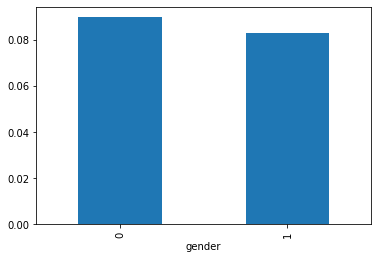

In [73]:
train.groupby(['gender'])['is_promoted'].agg(np.mean).plot(kind='bar')

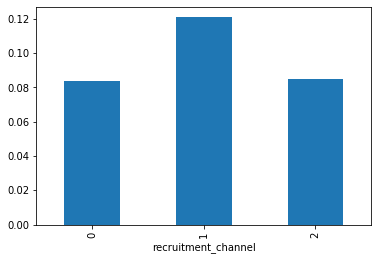

In [74]:
train.groupby(['recruitment_channel'])['is_promoted'].agg(np.mean).plot(kind='bar')

In [75]:
recChannel_lr.classes_

array(['other', 'referred', 'sourcing'], dtype=object)

In [76]:
train.groupby(['no_of_trainings'])['is_promoted'].agg(np.mean)

no_of_trainings
1     0.088107
2     0.075748
3     0.068694
4     0.055556
5     0.023438
6     0.045455
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: is_promoted, dtype: float64

delete the rows with no.of.trainings more than 6

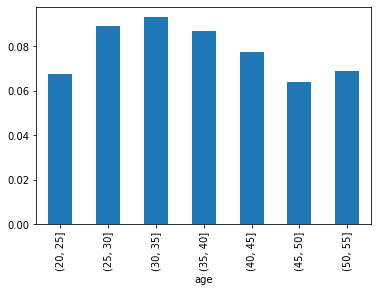

In [77]:
train.groupby(pd.cut(train['age'],np.arange(20,60,5)))['is_promoted'].agg(np.mean).plot(kind='bar')

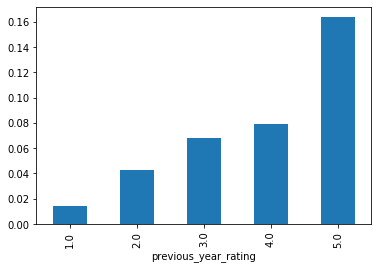

In [78]:
train.groupby('previous_year_rating')['is_promoted'].agg(np.mean).plot(kind='bar')

Highly effecting the promotion

In [79]:
train.groupby('length_of_service')['is_promoted'].agg(np.mean)

length_of_service
1     0.082912
2     0.089019
3     0.086592
4     0.087478
5     0.081447
6     0.084706
7     0.083589
8     0.093306
9     0.087105
10    0.093023
11    0.104803
12    0.079345
13    0.078603
14    0.052823
15    0.072513
16    0.074818
17    0.060185
18    0.063776
19    0.097264
20    0.078125
21    0.051282
22    0.098361
23    0.107692
24    0.000000
25    0.039216
26    0.000000
27    0.027778
28    0.066667
29    0.100000
30    0.000000
31    0.000000
32    0.200000
33    0.000000
34    0.250000
37    0.000000
Name: is_promoted, dtype: float64

No. of rows in each value for no.of.trainings

In [80]:
for x in range(1,37):
    print(str(x)+' ---------> '+ str(len(train[train['length_of_service']==x])))

1 ---------> 4547
2 ---------> 6684
3 ---------> 7033
4 ---------> 6836
5 ---------> 5832
6 ---------> 4734
7 ---------> 5551
8 ---------> 2883
9 ---------> 2629
10 ---------> 2193
11 ---------> 916
12 ---------> 794
13 ---------> 687
14 ---------> 549
15 ---------> 593
16 ---------> 548
17 ---------> 432
18 ---------> 392
19 ---------> 329
20 ---------> 128
21 ---------> 78
22 ---------> 61
23 ---------> 65
24 ---------> 70
25 ---------> 51
26 ---------> 41
27 ---------> 36
28 ---------> 30
29 ---------> 30
30 ---------> 12
31 ---------> 20
32 ---------> 10
33 ---------> 9
34 ---------> 4
35 ---------> 0
36 ---------> 0


Drop rows with >=35

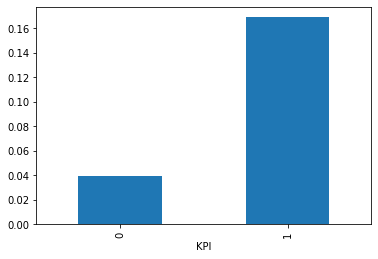

In [81]:
train.groupby(['KPI'])['is_promoted'].agg(np.mean).plot(kind='bar')

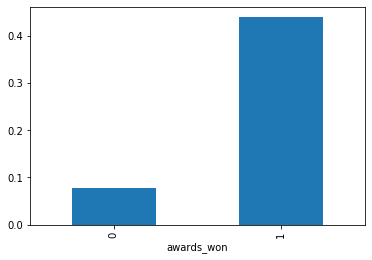

In [82]:
train.groupby(['awards_won'])['is_promoted'].agg(np.mean).plot(kind='bar')

In [83]:
train.avg_training_score.max()

99

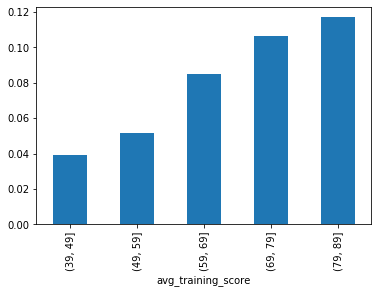

In [84]:
train.groupby(pd.cut(train['avg_training_score'],np.arange(39,99,10)))['is_promoted'].agg(np.mean).plot(kind='bar')

Highly effecting the target

In [85]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI', 'awards_won', 'avg_training_score',
       'is_promoted', 'age_log'],
      dtype='object')

In [86]:
train.shape

(54808, 15)

In [87]:
train.dtypes

employee_id                int64
department                 int32
region                     int32
education                  int32
gender                     int32
recruitment_channel        int32
no_of_trainings            int64
age                        int64
previous_year_rating    category
length_of_service          int64
KPI                        int64
awards_won                 int64
avg_training_score         int64
is_promoted                int64
age_log                  float64
dtype: object

In [88]:
def FeatureImportance(model):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(12,6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Creating baseline model with raw features

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [90]:
clf_lr = LogisticRegression()
smote = SMOTE()

In [91]:
X = np.array(train.drop(['employee_id','is_promoted','age_log'],axis=1))
y = np.array(train['is_promoted'])

In [92]:
len(train.drop(['employee_id','is_promoted','age_log'],axis=1).columns)

12

In [93]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=32)

In [95]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
y_pred = clf_lr.predict(X_test)

In [97]:
from sklearn import metrics

In [98]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [99]:
cm = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm['Predicted Negative'][0]/(cm['Predicted Negative'][0]+cm['Predicted Negative'][1]))*100)
per_list.append((cm['Predicted Positive'][1]/(cm['Predicted Positive'][0]+cm['Predicted Positive'][1]))*100)

cm.insert(2,'Correct percentage',per_list)

cm

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,7368,2762,75.076421
Actual Positive,2446,7480,73.032611


In [100]:
from sklearn.metrics import f1_score

In [101]:
f1_score(y_test,y_pred)

0.7417691392304641

# The f1 score for logistic regression base-line model is ~ 0.74

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
clf_dt = DecisionTreeClassifier(max_depth=8)

In [104]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
y_pred_dt = clf_dt.predict(X_test)

In [106]:
cm_dt = metrics.confusion_matrix(y_test,y_pred_dt)
cm_dt = pd.DataFrame(cm_dt, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm_dt['Predicted Negative'][0]/(cm_dt['Predicted Negative'][0]+cm_dt['Predicted Negative'][1]))*100)
per_list.append((cm_dt['Predicted Positive'][1]/(cm_dt['Predicted Positive'][0]+cm_dt['Predicted Positive'][1]))*100)

cm_dt.insert(2,'Correct percentage',per_list)

cm_dt

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,9333,797,82.710032
Actual Positive,1951,7975,90.914273


In [107]:
f1_score(y_test,y_pred_dt)

0.85303240988341

# The f1 score for Decition tree base-line model is ~ 0.85

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
clf_rf = RandomForestClassifier(n_estimators=8)

In [110]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
y_pred_rf = clf_rf.predict(X_test)

In [112]:
cm_rf = metrics.confusion_matrix(y_test,y_pred_rf)
cm_rf = pd.DataFrame(cm_rf, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm_rf['Predicted Negative'][0]/(cm_rf['Predicted Negative'][0]+cm_rf['Predicted Negative'][1]))*100)
per_list.append((cm_rf['Predicted Positive'][1]/(cm_rf['Predicted Positive'][0]+cm_rf['Predicted Positive'][1]))*100)

cm_rf.insert(2,'Correct percentage',per_list)

cm_rf

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,9960,170,93.997735
Actual Positive,636,9290,98.202960


In [113]:
f1_score(y_test,y_pred_rf)

0.9584236046631589

Feature ranking:
1. feature 7 (0.223563)
2. feature 9 (0.189291)
3. feature 11 (0.128587)
4. feature 3 (0.071137)
5. feature 10 (0.065576)
6. feature 6 (0.057111)
7. feature 8 (0.050971)
8. feature 5 (0.049308)
9. feature 0 (0.048639)
10. feature 1 (0.046794)
11. feature 4 (0.046119)
12. feature 2 (0.022904)


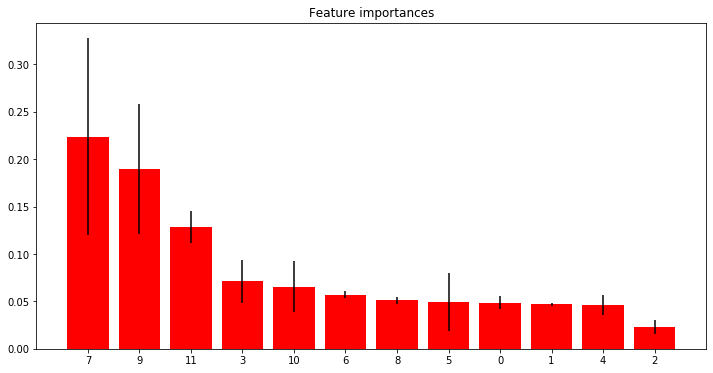

In [114]:
FeatureImportance(clf_rf)

# The f1 score for Random forest base-line model is ~ 0.96

In [115]:
from xgboost import XGBClassifier

In [116]:
clf_xgb = XGBClassifier()

In [117]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [118]:
y_pred_xgb = clf_xgb.predict(X_test)

In [119]:
cm_xgb = metrics.confusion_matrix(y_test,y_pred_xgb)
cm_xgb = pd.DataFrame(cm_xgb, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm_xgb['Predicted Negative'][0]/(cm_xgb['Predicted Negative'][0]+cm_xgb['Predicted Negative'][1]))*100)
per_list.append((cm_xgb['Predicted Positive'][1]/(cm_xgb['Predicted Positive'][0]+cm_xgb['Predicted Positive'][1]))*100)

cm_xgb.insert(2,'Correct percentage',per_list)

cm_xgb

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,10001,129,89.175212
Actual Positive,1214,8712,98.540889


In [120]:
f1_score(y_test,y_pred_xgb)

0.9284382160174776

# The f1 score for XGBoost base-line model is ~ 0.93

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

# Feature Engineering

In [121]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


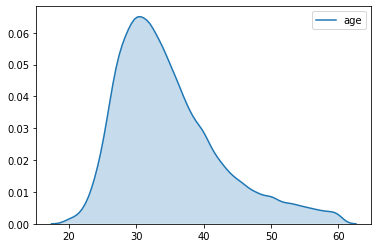

In [122]:
sns.kdeplot(train.age,shade=True)

In [123]:
train['age_log'] = np.log(train.age)

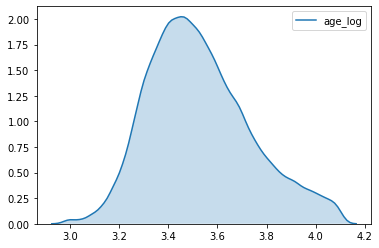

In [124]:
sns.kdeplot(train.age_log,shade=True)

In [125]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


In [126]:
train.groupby(pd.cut(train['age'],np.arange(20,60,5)))['is_promoted'].agg(np.mean)

age
(20, 25]    0.067563
(25, 30]    0.089380
(30, 35]    0.093059
(35, 40]    0.086721
(40, 45]    0.077427
(45, 50]    0.064190
(50, 55]    0.068966
Name: is_promoted, dtype: float64

In [127]:
train['age_bins'] = pd.cut(train.age,np.arange(19,65,5))

In [128]:
train.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
employee_id,1.000000,-0.005187,-0.003423,0.002119,-0.001542,0.005960,-0.005121,0.000437,0.001274,-0.002501,0.008420,-0.000586,0.001206,0.000729
department,-0.005187,1.000000,-0.020592,0.043433,-0.030108,0.004732,0.014152,0.079162,0.059060,-0.088209,-0.002151,-0.251626,0.000130,0.077476
region,-0.003423,-0.020592,1.000000,-0.003837,0.019730,-0.000920,-0.004590,-0.088918,-0.058939,-0.007664,0.000307,0.023572,0.008841,-0.084015
education,0.002119,0.043433,-0.003837,1.000000,-0.032355,-0.003540,-0.033477,0.339983,0.233691,0.012107,-0.001412,0.032778,0.029251,0.354597
gender,-0.001542,-0.030108,0.019730,-0.032355,1.000000,0.006567,0.084501,-0.016293,-0.019675,-0.037400,0.002381,-0.024494,-0.011109,-0.015919
recruitment_channel,0.005960,0.004732,-0.000920,-0.003540,0.006567,1.000000,-0.010405,-0.011400,-0.002887,-0.000297,-0.005510,-0.002416,0.002229,-0.011105
no_of_trainings,-0.005121,0.014152,-0.004590,-0.033477,0.084501,-0.010405,1.000000,-0.081278,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,-0.082248
age,0.000437,0.079162,-0.088918,0.339983,-0.016293,-0.011400,-0.081278,1.000000,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,0.991048
length_of_service,0.001274,0.059060,-0.058939,0.233691,-0.019675,-0.002887,-0.057275,0.657111,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,0.654950
KPI,-0.002501,-0.088209,-0.007664,0.012107,-0.037400,-0.000297,-0.045576,-0.025592,-0.077693,1.000000,0.097000,0.078391,0.221582,-0.021030


In [129]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348,"(34, 39]"
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197,"(29, 34]"
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361,"(29, 34]"
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562,"(34, 39]"
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662,"(44, 49]"


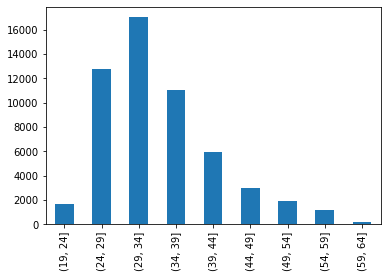

In [130]:
train.age_bins.value_counts(sort=False).plot('bar')

In [131]:
age_lr = LabelEncoder()

In [132]:
train['age_bins'] = age_lr.fit_transform(train.age_bins)

In [133]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348,3
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197,2
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361,2
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562,3
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662,5


In [134]:
train[(train['no_of_trainings']>=6) & (train['is_promoted']==1)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
35417,65804,5,14,0,1,0,6,28,1.0,5,1,0,68,1,3.332205,1
49856,17576,7,31,0,1,0,6,25,5.0,1,1,0,50,1,3.218876,1


In [135]:
train['no_of_trainings'].max()

10

# Dropping rows with no_of_trainings>6 and is_promoted = 0 because it's introducing bias to the model

In [136]:
train = train.drop(train[(train['no_of_trainings']>=6) & (train['is_promoted']!=1)].index)

In [137]:
train[train['no_of_trainings']>=6]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
35417,65804,5,14,0,1,0,6,28,1.0,5,1,0,68,1,3.332205,1
49856,17576,7,31,0,1,0,6,25,5.0,1,1,0,50,1,3.218876,1


In [138]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348,3
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197,2
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361,2
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562,3
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662,5


# Dropping rows with length_of_service > 32 and is_promoted = 0 because it's introducing bias to the model

In [139]:
train = train.drop(train[(train['length_of_service']>32) & (train['is_promoted']!=1)].index)

In [140]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348,3
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197,2
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361,2
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562,3
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662,5


~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

# Creating model with custom features

In [141]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log,age_bins
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348,3
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,3.401197,2
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361,2
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,3.663562,3
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662,5


In [142]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPI', 'awards_won', 'avg_training_score',
       'is_promoted', 'age_log', 'age_bins'],
      dtype='object')

In [143]:
train = pd.get_dummies(train, columns=['department','region','education','gender','recruitment_channel','awards_won'])

In [144]:
train.shape

(54726, 63)

In [145]:
X = np.array(train.drop(['employee_id','age','is_promoted', 'age_log'],axis=1))

In [146]:
y = np.array(train['is_promoted'])

In [147]:
clf_dt = DecisionTreeClassifier(max_depth=8)
smote = SMOTE()

In [148]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=32)

In [150]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [151]:
y_pred = clf_dt.predict(X_test)

In [152]:
from sklearn import metrics

In [153]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [154]:
cm = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm['Predicted Negative'][0]/(cm['Predicted Negative'][0]+cm['Predicted Negative'][1]))*100)
per_list.append((cm['Predicted Positive'][1]/(cm['Predicted Positive'][0]+cm['Predicted Positive'][1]))*100)

cm.insert(2,'Correct percentage',per_list)

cm

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,7852,2188,90.596516
Actual Positive,815,9169,80.734349


In [155]:
from sklearn.metrics import f1_score

In [156]:
f1_score(y_test,y_pred)

0.85928494447308

In [157]:
clf_xgb = XGBClassifier()

In [158]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [159]:
y_pred = clf_xgb.predict(X_test)

In [160]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [161]:
cm = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm['Predicted Negative'][0]/(cm['Predicted Negative'][0]+cm['Predicted Negative'][1]))*100)
per_list.append((cm['Predicted Positive'][1]/(cm['Predicted Positive'][0]+cm['Predicted Positive'][1]))*100)

cm.insert(2,'Correct percentage',per_list)

cm

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,9530,510,92.103991
Actual Positive,817,9167,94.729772


In [162]:
from sklearn.metrics import f1_score

In [163]:
f1_score(y_test,y_pred)

0.9325059762982555

# Now training XGB on the entire dataset

In [164]:
X = np.array(train.drop(['employee_id','age_bins','is_promoted', 'age_log'],axis=1))

In [165]:
y = np.array(train['is_promoted'])

In [166]:
clf_xgb = XGBClassifier()
smote = SMOTE()

In [167]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [168]:
clf_xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Preprocessing the test data

In [169]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [170]:
test.department = dep_lr.fit_transform(test.department)

In [171]:
test.region = reg_lr.fit_transform(test.region)

In [172]:
test['education'] = test['education'].fillna(test.groupby(['age'])['education'].apply(lambda x:x.mode()[0]))

In [173]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1033
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [174]:
test.education = test.education.fillna("Bachelor's")

In [175]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# Label Encoding education

In [176]:
test.education = edu_lr.fit_transform(test.education)

In [177]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,m,sourcing,1,24,NaN,1,1,0,77
1,74430,2,28,0,f,other,1,31,3.0,5,0,0,51
2,72255,7,4,0,m,other,1,31,1.0,4,0,0,47
3,38562,5,11,0,f,other,3,31,2.0,9,0,0,65
4,64486,1,21,0,m,sourcing,1,30,4.0,7,0,0,61


# Gender

In [178]:
test.gender = gen_lr.fit_transform(test.gender)

In [179]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,sourcing,1,24,NaN,1,1,0,77
1,74430,2,28,0,0,other,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,other,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,other,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,sourcing,1,30,4.0,7,0,0,61


# recruitment_channel

In [180]:
test.recruitment_channel = recChannel_lr.fit_transform(test.recruitment_channel)

In [181]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,NaN,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


# Filling missing values in previous_year_rating

In [182]:
test.dtypes

employee_id               int64
department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [183]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,NaN,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [184]:
test.previous_year_rating = test.previous_year_rating.astype('category')

In [185]:
test.dtypes

employee_id                int64
department                 int32
region                     int32
education                  int32
gender                     int32
recruitment_channel        int32
no_of_trainings            int64
age                        int64
previous_year_rating    category
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
dtype: object

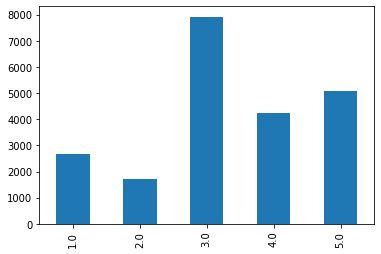

In [186]:
test.previous_year_rating.value_counts(sort=False).plot(kind='bar')

In [187]:
test.rename(columns={'KPIs_met >80%':'KPI','awards_won?':'awards_won'},inplace=True)

In [188]:
test['previous_year_rating'] = test['previous_year_rating'].fillna(test.groupby('KPI')['previous_year_rating'].transform(lambda x:x.mode()[0]))

In [189]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPI                     0
awards_won              0
avg_training_score      0
dtype: int64

In [190]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score
0,8724,8,18,0,1,2,1,24,5.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [191]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score
0,8724,8,18,0,1,2,1,24,5.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [192]:
test['age_bins'] = pd.cut(test.age,np.arange(19,65,5))

In [193]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,age_bins
0,8724,8,18,0,1,2,1,24,5.0,1,1,0,77,"(19, 24]"
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51,"(29, 34]"
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47,"(29, 34]"
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65,"(29, 34]"
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61,"(29, 34]"


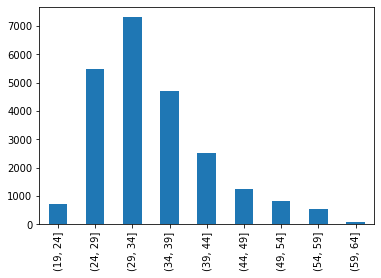

In [194]:
test.age_bins.value_counts(sort=False).plot('bar')

In [195]:
test['age_bins'] = age_lr.fit_transform(test.age_bins)

In [196]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,age_bins
0,8724,8,18,0,1,2,1,24,5.0,1,1,0,77,0
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51,2
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47,2
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65,2
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61,2


In [197]:
test.index

RangeIndex(start=0, stop=23490, step=1)

In [198]:
test['no_of_trainings'].max()

9

In [199]:
test = pd.get_dummies(test, columns=['department','region','education','gender','recruitment_channel','awards_won'])

In [200]:
test_X = np.array(test.drop(['employee_id','age_bins'],axis=1))

In [201]:
pred_xgb = clf_xgb.predict(test_X)

In [202]:
np.unique(pred_xgb)

array([0, 1], dtype=int64)

In [203]:
sample = pd.read_csv('sample_submission_M0L0uXE.csv')
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [204]:
sample['is_promoted'].shape

(23490,)

In [205]:
len(pred_xgb)

23490

In [206]:
sample['is_promoted'] = pred_xgb

In [207]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [208]:
sample.to_csv('XGB_custom.csv',index=False)

In [209]:
sub1 = pd.read_csv('XGB_custom.csv')
sub1

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


# LightGBM

In [210]:
import lightgbm as lgb

d_train = lgb.Dataset(X_resampled, label=y_resampled)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf_lgb = lgb.train(params, d_train, 100)

In [211]:
pred_lgb=clf_lgb.predict(test_X)
for i in range(0,(test.shape[0])):
    if pred_lgb[i]>=.5: 
       pred_lgb[i]=1
    else:  
       pred_lgb[i]=0


In [212]:
len(pred_lgb)

23490

In [213]:
sub2 = sample.copy()

In [214]:
sub2['is_promoted'] = pred_lgb

In [215]:
sub2.is_promoted = sub2.is_promoted.astype('int64')

In [216]:
sub2.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [217]:
sub2.is_promoted.value_counts()

0    19805
1     3685
Name: is_promoted, dtype: int64

In [218]:
sub2.to_csv('LightGBM.csv',index=False)

# creating Features

In [219]:
train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,avg_training_score,is_promoted,age_log,age_bins,...,education_0,education_1,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2,awards_won_0,awards_won_1
0,65438,1,35,5.0,8,1,49,0,3.555348,3,...,0,0,1,1,0,0,0,1,1,0
1,65141,1,30,5.0,4,0,60,0,3.401197,2,...,1,0,0,0,1,1,0,0,1,0
2,7513,1,34,3.0,7,0,50,0,3.526361,2,...,1,0,0,0,1,0,0,1,1,0
3,2542,2,39,1.0,10,0,50,0,3.663562,3,...,1,0,0,0,1,1,0,0,1,0
4,48945,1,45,3.0,2,0,73,0,3.806662,5,...,1,0,0,0,1,1,0,0,1,0


# Life percentage in the cmpny

In [224]:
train['percent_experience'] = (train['length_of_service']/train['age'])*100

In [225]:
train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,avg_training_score,is_promoted,age_log,age_bins,...,education_1,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2,awards_won_0,awards_won_1,percent_experience
0,65438,1,35,5.0,8,1,49,0,3.555348,3,...,0,1,1,0,0,0,1,1,0,22.857143
1,65141,1,30,5.0,4,0,60,0,3.401197,2,...,0,0,0,1,1,0,0,1,0,13.333333
2,7513,1,34,3.0,7,0,50,0,3.526361,2,...,0,0,0,1,0,0,1,1,0,20.588235
3,2542,2,39,1.0,10,0,50,0,3.663562,3,...,0,0,0,1,1,0,0,1,0,25.641026
4,48945,1,45,3.0,2,0,73,0,3.806662,5,...,0,0,0,1,1,0,0,1,0,4.444444


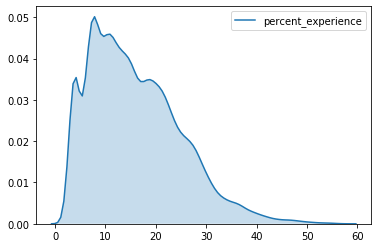

In [226]:
sns.kdeplot(train['percent_experience'],shade=True)

# Cummilative of training score and rating

In [239]:
train['avg_training_score'] = train['avg_training_score'].astype('int64',inplace=True)

In [237]:
train['previous_year_rating'] = train['previous_year_rating'].astype('int64',inplace=True)

In [240]:
train['total_score'] = train['avg_training_score'] + train['previous_year_rating']

In [242]:
train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,avg_training_score,is_promoted,age_log,age_bins,...,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2,awards_won_0,awards_won_1,percent_experience,total_score
0,65438,1,35,5,8,1,49,0,3.555348,3,...,1,1,0,0,0,1,1,0,22.857143,54
1,65141,1,30,5,4,0,60,0,3.401197,2,...,0,0,1,1,0,0,1,0,13.333333,65
2,7513,1,34,3,7,0,50,0,3.526361,2,...,0,0,1,0,0,1,1,0,20.588235,53
3,2542,2,39,1,10,0,50,0,3.663562,3,...,0,0,1,1,0,0,1,0,25.641026,51
4,48945,1,45,3,2,0,73,0,3.806662,5,...,0,0,1,1,0,0,1,0,4.444444,76


In [243]:
train['previous_year_rating'] = train['previous_year_rating'].astype('category',inplace=True)

# Training the model

In [260]:
X = np.array(train.drop(['employee_id','is_promoted','age_log','age'],axis=1))

In [261]:
y = np.array(train['is_promoted'])

In [262]:
clf_xgb = XGBClassifier()
smote = SMOTE()

In [263]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [264]:
clf_xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [265]:
test['percent_experience'] = (test['length_of_service']/test['age'])*100

In [266]:
test['avg_training_score'] = test['avg_training_score'].astype('int64',inplace=True)

In [267]:
test['previous_year_rating'] = test['previous_year_rating'].astype('int64',inplace=True)

In [268]:
test['total_score'] = test['avg_training_score'] + test['previous_year_rating']

In [269]:
test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,avg_training_score,age_bins,department_0,department_1,...,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2,awards_won_0,awards_won_1,percent_experience,total_score
0,8724,1,24,5,1,1,77,0,0,0,...,0,0,1,0,0,1,1,0,4.166667,82
1,74430,1,31,3,5,0,51,2,0,0,...,0,1,0,1,0,0,1,0,16.129032,54
2,72255,1,31,1,4,0,47,2,0,0,...,0,0,1,1,0,0,1,0,12.903226,48
3,38562,3,31,2,9,0,65,2,0,0,...,0,1,0,1,0,0,1,0,29.032258,67
4,64486,1,30,4,7,0,61,2,0,1,...,0,0,1,0,0,1,1,0,23.333333,65


In [270]:
test['previous_year_rating'] = test['previous_year_rating'].astype('category',inplace=True)

In [271]:
test_X = np.array(test.drop(['employee_id','age'],axis=1))

In [272]:
pred_xgb = clf_xgb.predict(test_X)

In [273]:
np.unique(pred_xgb)

array([0, 1], dtype=int64)

In [274]:
sample = pd.read_csv('sample_submission_M0L0uXE.csv')
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [275]:
sub_custom_features1 = sample.copy()

In [276]:
sub_custom_features1['is_promoted'] = pred_xgb

In [278]:
sub_custom_features1.is_promoted.value_counts()

0    22718
1      772
Name: is_promoted, dtype: int64

In [279]:
sub_custom_features1.to_csv('sub_custom_features1.csv',index=False)

In [280]:
clf_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}